## Problem Statement:-
Classifing handwritten digit image into 0 to 9 by using Convolution neural network, Support Vector Model and K Nearest Neighbours.

#### 1. Importing basic library with dataset

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

# load handwritten digit image from mnist dataset to x_train,y_train,x_test & y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


#### 2. Visualizing first image

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

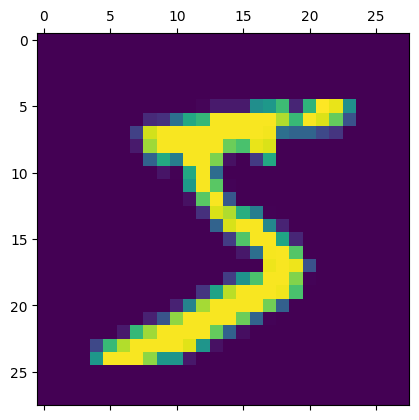

In [ ]:
# images are in binary code (28,28)
# we visualize tat image by using matplot library

import matplotlib.pyplot as plt

plt.matshow(x_train[0])

In [ ]:
y_train # y train contains label of images # output layer

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 3. Shape of dataset

In [ ]:
print("shape of x train and y train are",x_train.shape,y_train.shape)
print("shape of x test and y test are",x_test.shape,y_test.shape)

shape of x train and y train are (60000, 28, 28) (60000,)
shape of x test and y test are (10000, 28, 28) (10000,)


#### 4.Visualize the First 50 Training Images

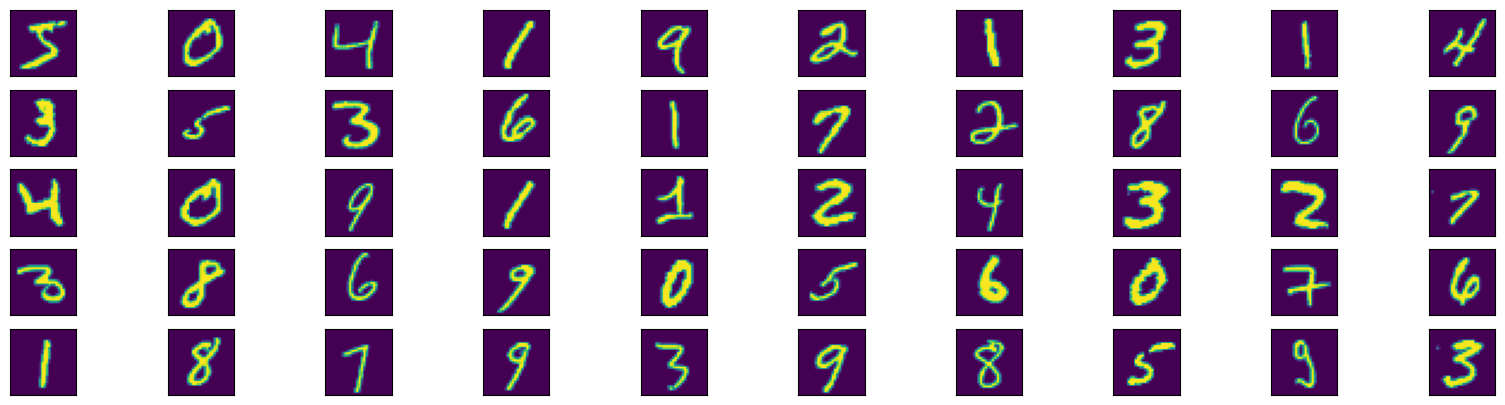

In [ ]:
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i])

### 5. Data preprocessing

#### Rescaling image

In [ ]:
## Rescaling x_train & x_test
x_train = x_train.astype('float32')/255 ## x _ train & x_test are in integer datatype .we converting integer into float
x_test = x_test.astype('float32')/255

In [ ]:
## Rescaling y train and y_test
from keras.utils import to_categorical

# Determine the number of classes
num_classes = len(set(y_train))

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes)## we converting our y labels into categorical by using one hot encoding
y_test = to_categorical(y_test, num_classes)


### 6. Splitting data into training and validation

In [ ]:
(x_train, x_valid) = x_train[10000:], x_train[:10000]
(y_train, y_valid) = y_train[10000:], y_train[:10000]

In [ ]:
# print number of training, validation, and test images
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
print(x_valid.shape, 'validation samples')

(50000, 28, 28) train samples
(10000, 28, 28) test samples
(10000, 28, 28) validation samples


## 7.Building CNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu',
                        input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500, activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 64)          0

## 8.Compile Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## we using categorical cross entropy as loss function , because we have categorical o/p label,
## we using optimizer as adam (adaptive moment estimation), because it had computes adaptive learning rates,
## we using metrics as accuracy , to evaluate model performance

In [ ]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=15,
        validation_data=(x_valid, y_valid),callbacks=[checkpointer],verbose=1,
           shuffle=True)

Epoch 1/15
1563/1563 [==============================] - 36s 22ms/step - loss: 0.2449 - accuracy: 0.9217 - val_loss: 0.0870 - val_accuracy: 0.9747
Epoch 2/15
   7/1563 [..............................] - ETA: 28s - loss: 0.1584 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 33s 21ms/step - loss: 0.0868 - accuracy: 0.9728 - val_loss: 0.0583 - val_accuracy: 0.9832
Epoch 3/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0664 - accuracy: 0.9786 - val_loss: 0.0527 - val_accuracy: 0.9849
Epoch 4/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.0569 - accuracy: 0.9819 - val_loss: 0.0462 - val_accuracy: 0.9873
Epoch 5/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0405 - val_accuracy: 0.9885
Epoch 6/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0486 - val_accuracy: 0.9871
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0416 - accuracy: 0.9866 - val_loss: 0.0359 - val_accuracy: 0.9890
Epoch 8/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.0364 - accuracy: 0.9881 - val_loss: 0.0397 - val_accura

In [ ]:
# get predictions on the test set
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step


### 9.Model Evaluation

In [ ]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.2f%%' % accuracy)

Test accuracy: 99.21%


### 10. Model Prediction

In [ ]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

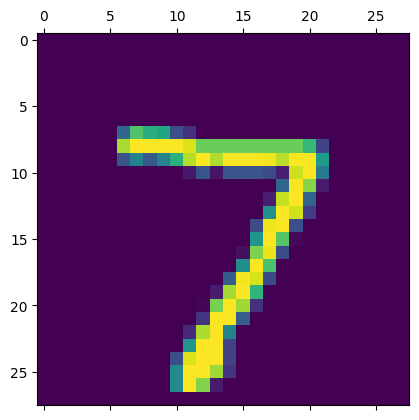

In [ ]:
## visualizing first image of x_ test
plt.matshow(x_test[0])

In [ ]:
y_pred ## prediction  of x test image

array([[1.95091148e-15, 1.69733294e-08, 3.90639965e-10, ...,
        9.99999940e-01, 2.33779554e-12, 1.72454932e-11],
       [7.48238832e-11, 3.86338286e-07, 9.99999583e-01, ...,
        8.69639222e-11, 6.16937057e-11, 3.39486182e-11],
       [2.05044634e-10, 9.99999225e-01, 2.08290030e-09, ...,
        6.05329888e-07, 3.16089266e-09, 2.75690470e-10],
       ...,
       [3.87241144e-15, 4.46720946e-07, 1.17794368e-11, ...,
        2.22910801e-10, 1.53745905e-08, 2.70802669e-09],
       [1.00777615e-10, 6.73015636e-12, 8.97583050e-12, ...,
        2.94959161e-11, 3.84731811e-06, 3.09515913e-10],
       [7.63644634e-11, 5.99141721e-13, 1.53495738e-12, ...,
        2.12110306e-18, 1.59981403e-10, 8.03308344e-15]], dtype=float32)

In [ ]:
## output labels are in 0 to 9. we get output in a array format which contain 10 prediction accuracy values, in that which position accuarcy is high,that are our label
y_pred[0]

array([1.9509115e-15, 1.6973329e-08, 3.9063996e-10, 7.8953559e-11,
       1.7600931e-11, 8.5244379e-14, 4.0240869e-18, 9.9999994e-01,
       2.3377955e-12, 1.7245493e-11], dtype=float32)

In [ ]:
np.argmax(y_pred[0])

7

we finally predict exact value of our x test input. we got accuracy as 99.21%

## Support Vector and K NN implementation

#### converting image into binary dataset by dividing mnist data by 255 to implement support vector machine and k- nearest neighbors

In [ ]:
from sklearn import datasets

# Load the MNIST dataset
mnist = datasets.fetch_openml("mnist_784")
x, y = mnist.data / 255.0, mnist.target.astype(int)
### converting image into dataset by dividing 255

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

## Support Vector Machine

## 1. Model Building

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=3)

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC()

In [ ]:
# predict output for X_test
y_pred2=svc.predict(x_test)

In [ ]:
y_test

2758     5
37134    3
29158    3
5365     6
52942    2
        ..
9584     1
68153    2
1689     3
63527    3
22173    1
Name: class, Length: 21000, dtype: int64

In [ ]:
y_pred2

array([5, 5, 3, ..., 3, 3, 1])

## 2.Model Evaluation

In [ ]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
accuracy_score(y_test,y_pred2)


0.9773333333333334

## K-Nearest Neighbors
## Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
### Predict output for X_test
y_pred3=knn.predict(x_test)

In [ ]:
y_test

2758     5
37134    3
29158    3
5365     6
52942    2
        ..
9584     1
68153    2
1689     3
63527    3
22173    1
Name: class, Length: 21000, dtype: int64

In [ ]:
y_pred3

array([5, 3, 3, ..., 3, 3, 1])

## 2.Model Evaluation

In [ ]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
accuracy_score(y_test,y_pred3)

0.9713333333333334

## **Model Evaluation score**

1. By using computational neuron network, accuracy score is 99.21%
2. By using support vector machine,accuracy score is 97.73%
3. By using K Nearest Neighbors , accuracy score is 97.13%